In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import yfinance as yf
df = yf.download

In [3]:
import yfinance as yf

start = '2010-01-01'
end = '2025-07-31'

df = yf.download('AAPL', start=start, end=end)
df.head()


C:\Users\johri\AppData\Local\Temp\ipykernel_18076\925470043.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.431896,6.446623,6.382908,6.414465,493729600
2010-01-05,6.443016,6.479382,6.409054,6.449628,601904800
2010-01-06,6.340532,6.468563,6.333920,6.443017,552160000
2010-01-07,6.328811,6.371488,6.282828,6.363974,477131200
2010-01-08,6.370886,6.371488,6.283129,6.320395,447610800


In [4]:
df=df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.431896,6.446623,6.382908,6.414465,493729600
1,2010-01-05,6.443016,6.479382,6.409054,6.449628,601904800
2,2010-01-06,6.340532,6.468563,6.333920,6.443017,552160000
3,2010-01-07,6.328811,6.371488,6.282828,6.363974,477131200
4,2010-01-08,6.370886,6.371488,6.283129,6.320395,447610800


In [5]:
df=df.drop(['Date'], axis=1)
df.head()

C:\Users\johri\AppData\Local\Temp\ipykernel_18076\2547152359.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(['Date'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.431896,6.446623,6.382908,6.414465,493729600
1,6.443016,6.479382,6.409054,6.449628,601904800
2,6.340532,6.468563,6.333920,6.443017,552160000
3,6.328811,6.371488,6.282828,6.363974,477131200
4,6.370886,6.371488,6.283129,6.320395,447610800


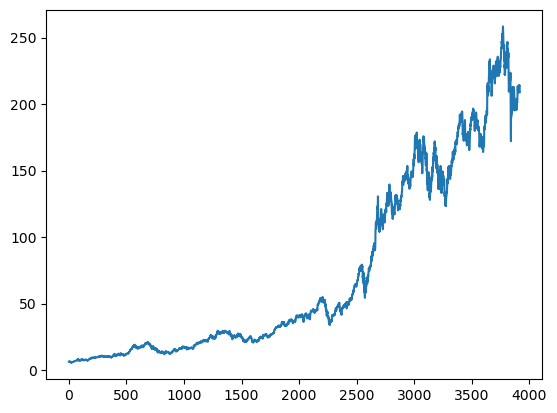

In [6]:
plt.plot(df.Close)

In [7]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3912,207.765078
3913,207.526695
3914,207.310985
3915,207.069373


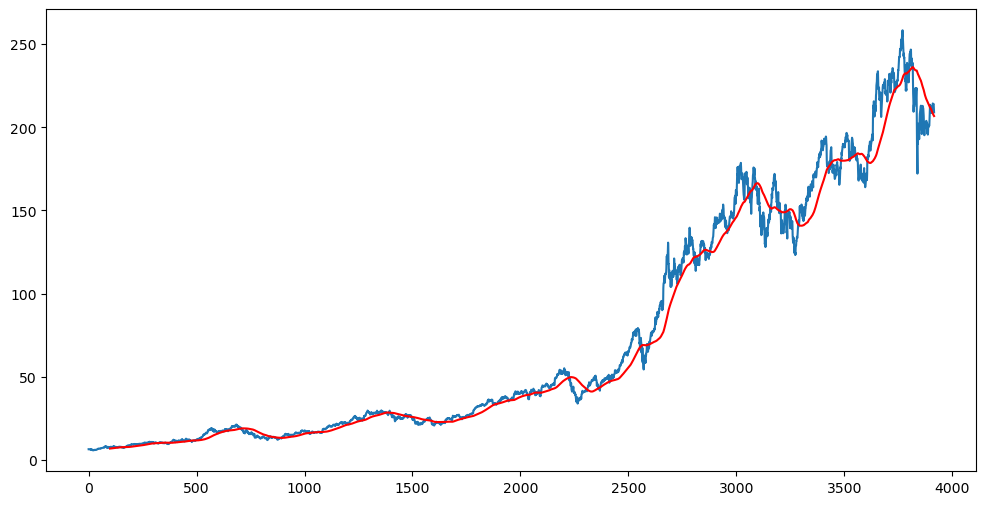

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [9]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3912,221.725944
3913,221.665316
3914,221.630999
3915,221.562453


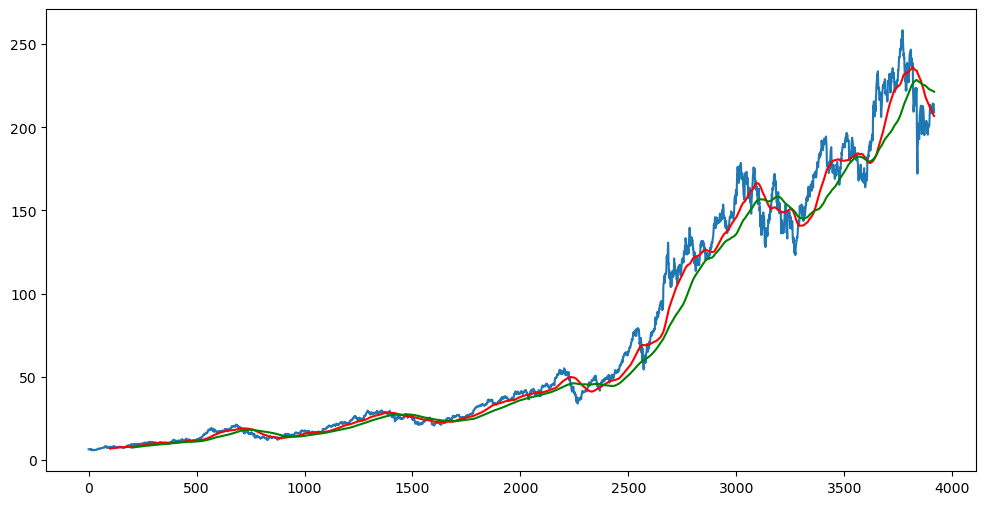

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [11]:
df.shape

(3917, 5)

In [12]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2741, 1)
(1176, 1)


In [13]:
data_testing.head()

Ticker,AAPL
2741,114.465363
2742,111.060883
2743,112.348541
2744,113.187469
2745,113.733757


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.00528434],
       [0.00537337],
       [0.00455281],
       ...,
       [0.88628712],
       [0.87566484],
       [0.8804292 ]])

In [16]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train=np.array(x_train), np.array(y_train)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(60, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(80, return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(120))  # Last LSTM layer
model.add(Dropout(0.5))

model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')



C:\Users\johri\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step - loss: 0.0053
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 0.0020
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - loss: 0.0019
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 0.0016 
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0016
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 0.0015
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 0.0014     
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 0.0013
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 0.0011 
Epoch 10/50
16/83 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0010    

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

In [ ]:
past_100_days= data_training.tail(100)

In [ ]:
import pandas as pd

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [ ]:
final_df.head()

In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

In [ ]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test, y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
y_predicted=model.predict(x_test)

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
factor=scaler.scale_
factor

In [ ]:
scale_factor=1/factor
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='original price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()